In [1]:
source("~/software/notebook_assist/functions.R")
source("~/software/notebook_assist/packages.R")

setwd("~/projects/Resource/manuscript/")
list.files()

[1] "figures"             "input"               "notebooks"          
[4] "source_data"         "supplemental_tables"

### QTL Module Summary - Figure 4a-c

`summarise()` has grouped output by 'Tissue', 'Cluster ID'. You can override
using the `.groups` argument.


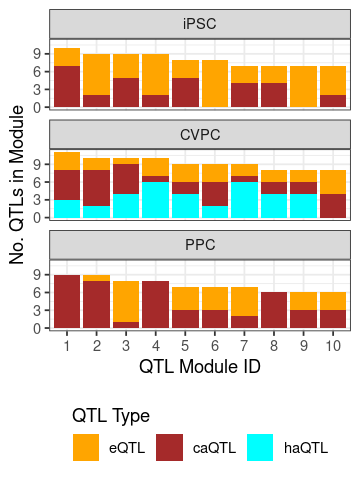

In [2]:
qtl_modules = fread("input/figure4/TableS11_QTLModules.txt",sep="\t",data.table=F)

qtl_modules_summary = qtl_modules %>% 
                            group_by(Tissue,`Cluster ID`, `Molecular QTL Type`) %>% 
                            summarise(QTL_count = n())

qtl_modules_summary$ModNum = as.numeric(str_extract(qtl_modules_summary$`Cluster ID`, "[0-9]+"))
qtl_modules_summary$`QTL Type` = factor(qtl_modules_summary$`Molecular QTL Type`, levels=c("eQTL","caQTL","haQTL"))
qtl_modules_summary$Tissue = factor(qtl_modules_summary$Tissue , levels = c("iPSC","CVPC","PPC"))
psize(4,3)
summary_plot = ggplot(qtl_modules_summary[ qtl_modules_summary$ModNum  <= 10, ], aes(factor(ModNum, levels=1:10), 
                                                                      QTL_count, fill =`QTL Type`)) +
                        theme_bw() + ylab("No. QTLs in Module") + xlab("QTL Module ID") +
                        theme(legend.position ="bottom") +
                        geom_bar(stat="identity") + facet_wrap(~Tissue,nrow=3) + 
                        scale_fill_manual(values=c("orange","brown","cyan")) + 
                        guides(fill = guide_legend(override.aes = list(size = 6), title.position="top"))
summary_plot

### Graph network - Figure 4d 
#### edges exported and graph generated with Cytoscape

In [3]:
ppc_colocs  = fread("../SupplementalTables/TableS10_Colocalization_v2.txt",sep="\t",data.table=F) %>% filter(Tissue == "PPC")
ppc_colocs$Element1_Cond = paste(ppc_colocs$`Element1 ID`,ppc_colocs$`Element1 Condition`,sep="_")
ppc_colocs$Element2_Cond = paste(ppc_colocs$`Element2 ID`,ppc_colocs$`Element2 Condition`,sep="_")

ppc_module3 = qtl_modules[ qtl_modules$`Cluster ID` == "PPC_3",]
ppc_module3$Element_Cond = paste(ppc_module3$`Element ID`, ppc_module3$Condition, sep="_")

gencode = fread("/reference/private/Gencode.v44lift38/gene_info.txt",sep="\t",data.table=F)[,5:6] %>% 
                    rename(`Element ID` = gene_id)
ppc_module3_annot = merge(gencode, ppc_module3)


In [4]:
ppc_colocs

Tissue,Element1 ID,Element1 Condition,Element2 ID,Element2 Condition,Likely Colocalization Hypothesis,PP.H0,PP.H1,PP.H2,PP.H3,PP.H4,Top SNP ID,Top SNP Posterior Probability,QTL1 Top SNP P-value,QTL2 Top SNP P-value,Element1_Cond,Element2_Cond
<chr>,<chr>,<int>,<chr>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
PPC,ENSG00000000460.17,0,ENSG00000010165.20,0,PP.H0.abf,9.192809e-01,1.226101e-02,0.06272306,0.0008316726,0.004903305,VAR_1_170820459_T_G,0.030340190,3.163189e-01,3.580595e-04,ENSG00000000460.17_0,ENSG00000010165.20_0
PPC,ENSG00000000460.17,0,ENSG00000010165.20,1,PP.H0.abf,8.972824e-01,1.196760e-02,0.08338829,0.0011059449,0.006255806,VAR_1_170820459_T_G,0.030228558,3.163189e-01,1.920340e-04,ENSG00000000460.17_0,ENSG00000010165.20_1
PPC,ENSG00000000460.17,0,ENSG00000116132.12,0,PP.H0.abf,4.717372e-01,2.052448e-01,0.20652545,0.0898290171,0.026663499,VAR_1_170669192_A_G,0.007371513,5.416463e-01,2.192717e-06,ENSG00000000460.17_0,ENSG00000116132.12_0
PPC,ENSG00000000460.17,0,ENSG00000117523.18,0,PP.H0.abf,8.809313e-01,6.460050e-02,0.04550150,0.0033310828,0.005635624,VAR_1_170590969_C_G,0.006365460,6.471075e-01,3.525061e-03,ENSG00000000460.17_0,ENSG00000117523.18_0
PPC,ENSG00000000460.17,0,ENSG00000117533.15,0,PP.H0.abf,9.544750e-01,2.111012e-02,0.02176991,0.0004793192,0.002165618,VAR_1_170705762_C_T,0.014132104,1.213287e-01,1.767795e-02,ENSG00000000460.17_0,ENSG00000117533.15_0
PPC,ENSG00000000460.17,0,ENSG00000171806.12,0,PP.H2.abf,2.482387e-01,1.735358e-01,0.29626785,0.2070365388,0.074921137,VAR_1_169792450_A_G,0.003072032,3.625441e-06,9.451149e-10,ENSG00000000460.17_0,ENSG00000171806.12_0
PPC,ENSG00000000460.17,0,ENSG00000188404.10,0,PP.H2.abf,1.354919e-02,9.710593e-03,0.52726349,0.3778136854,0.071663040,VAR_1_169571354_T_C,0.023660967,3.831945e-02,1.214360e-11,ENSG00000000460.17_0,ENSG00000188404.10_0
PPC,ENSG00000000460.17,0,ppc_atac_peak_17716,0,PP.H0.abf,8.806805e-01,4.620365e-02,0.06377395,0.0033398080,0.006002121,VAR_1_168956502_T_C,0.015646563,5.704871e-01,2.735742e-06,ENSG00000000460.17_0,ppc_atac_peak_17716_0
PPC,ENSG00000000460.17,0,ppc_atac_peak_17739,0,PP.H2.abf,6.356850e-06,3.872477e-07,0.84856002,0.0515928943,0.099840344,VAR_1_169154971_T_A,0.012185888,1.503208e-01,3.068148e-21,ENSG00000000460.17_0,ppc_atac_peak_17739_0


In [4]:
ppc_module3_colocs = ppc_colocs[ ppc_colocs$Element1_Cond %in% c("ppc_atac_peak_168531_0",ppc_module3_annot$Element_Cond) & 
                                 ppc_colocs$Element2_Cond %in% c("ppc_atac_peak_168531_0",ppc_module3_annot$Element_Cond) ,]
rev(sort(table(ppc_module3_colocs$`Top SNP ID`)))
ppc_module3_edges = ppc_module3_colocs[ ,c("Element1 ID","Element2 ID")]
max(ppc_module3_colocs$PP.H4[ ppc_module3_colocs$`Top SNP ID` == "VAR_22_23924539_T_C"] )


VAR_22_23924539_T_C VAR_22_23924644_G_C VAR_22_23913109_C_T VAR_22_23916590_C_T 
                 12                   6                   5                   3 
VAR_22_23924860_C_T VAR_22_23908608_C_G 
                  1                   1 

[1] 0.9771414

### QTL Manhattan plots - Figure e-h

In [5]:
ppc_mod3_eqtls = as.data.frame(rbindlist(lapply(ppc_module3_annot$`Element ID`, function(egene){
    prefix="/projects/CARDIPS/analysis/epigenome_resource/eqtls/PPC/step_4/qtl_by_element/qtl/qtl."
    df = fread(paste0(prefix,egene,".txt"),sep="\t",data.table=F) %>% filter(type == 0)
    return(df)
})))
ppc_mod3_eqtls$type = "eqtl"
ppc_mod3_caqtl = fread("/projects/CARDIPS/analysis/epigenome_resource/caqtls/PPC/step_4/qtl_by_element/qtl/qtl.ppc_atac_peak_168531.txt",
                      sep="\t",data.table=F) %>% filter(type ==0)
ppc_mod3_caqtl$type = "caqtl"
ppc_mod3_qtls = rbind(ppc_mod3_eqtls,ppc_mod3_caqtl)
ppc_mod3_qtls$chrpos = gsub("_[A-Z]+_[A-Z]+","",gsub("VAR_","",ppc_mod3_qtls$id))

ppc_mod3_variants = unique(ppc_mod3_qtls$id)
# ppc_mod3_qtls

In [6]:
writeLines(sort(gsub("_[A-Z]+_[A-Z]+","",gsub("VAR_","",ppc_mod3_variants))),"input/figure4/snps.txt")

In [7]:
chr=22
reference = paste("input/figure4", paste0("chr", chr), sep = "/")
out = "input/figure4/plink"
cmd = paste("plink --extract", "input/figure4/snps.txt", "--bfile", reference, "--r2", "square", "--out", out, "--make-bed")
message(cmd)

plink --extract input/figure4/snps.txt --bfile input/figure4/chr22 --r2 square --out input/figure4/plink --make-bed



In [8]:
bim = fread("input/figure4/plink.bim", data.table = F, header = F) %>% mutate(id = paste(V2, V5, V6, sep = "_")) 

ld = fread("input/figure4/plink.ld", data.table = F)
rownames(ld) = bim$id
colnames(ld) = bim$id

bim = bim %>% filter(duplicated(V2) == F)

ld = ld[bim$id, bim$id]
colnames(ld) = bim$V2
rownames(ld) = bim$V2
topsnp="22_23924539"
ld = melt(as.matrix(ld)) %>% dplyr::rename(LD = value) %>% filter(Var1 == topsnp)


Warning message:
“The melt generic in data.table has been passed a matrix and will attempt to redirect to the relevant reshape2 method; please note that reshape2 is superseded and is no longer actively developed, and this redirection is now deprecated. To continue using melt methods from reshape2 while both libraries are attached, e.g. melt.list, you can prepend the namespace, i.e. reshape2::melt(as.matrix(ld)). In the next version, this warning will become an error.”


In [9]:
library(plyr)

------------------------------------------------------------------------------

You have loaded plyr after dplyr - this is likely to cause problems.
If you need functions from both plyr and dplyr, please load plyr first, then dplyr:
library(plyr); library(dplyr)

------------------------------------------------------------------------------


Attaching package: ‘plyr’


The following object is masked from ‘package:matrixStats’:

    count


The following objects are masked from ‘package:dplyr’:

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize




In [10]:
qtldata2 = merge(ppc_mod3_qtls, ld %>% dplyr::rename(chrpos = Var2) %>% select(chrpos, LD), by = "chrpos") %>% filter(!is.na(LD))
qtldata2$LD_group = ifelse(qtldata2$LD <= 0.2, "<0.2", NA)
qtldata2$LD_group = ifelse(qtldata2$LD > 0.2 & qtldata2$LD <= 0.4, "0.2-0.4", qtldata2$LD_group)
qtldata2$LD_group = ifelse(qtldata2$LD > 0.4 & qtldata2$LD <= 0.6, "0.4-0.6", qtldata2$LD_group)
qtldata2$LD_group = ifelse(qtldata2$LD > 0.6 & qtldata2$LD <= 0.8, "0.6-0.8", qtldata2$LD_group)
qtldata2$LD_group = ifelse(qtldata2$LD > 0.8, ">0.8", qtldata2$LD_group)

groups = c("<0.2", "0.2-0.4", "0.4-0.6", "0.6-0.8", ">0.8")

color_gradients = list("eqtl" = c("#ecede9", "#ffb344", "#e18c5a", "#8f5137", "#5c4033"), # orange-brown
                       "haqtl" = c("#ecede9", "#9689b9", "#61679a", "#534876", "#2d2c4e"), # purple
                       "caqtl" = c("#ecede9", "#93c47d", "#6aa84f", "#4c7835", "#274e13")) # green)


qtldata3 = as.data.frame(rbindlist(lapply(unique(qtldata2$type), function(t)
{
    this = qtldata2 %>% filter(type == t)
    this$color = suppressWarnings(mapvalues(this$LD_group, from = groups, to = color_gradients[[t]]))
    return(this)
})))


In [11]:
gen2 = gencode[ gencode$`Element ID` %in% qtldata3$element_id,] 
colnames(gen2) = c("element_id","gene_name")

qtldata4 = merge(qtldata3,rbind(gen2,
                    data.frame(element_id = c("ppc_atac_peak_168531"), 
                               gene_name = c("ppc_atac_peak_168531")))) %>% 
                    filter(gene_name %in% c("ppc_atac_peak_168531","GSTT2","MIF","DDTL")) 

qtldata4$gene_name = factor(qtldata4$gene_name, levels = c("ppc_atac_peak_168531","GSTT2","MIF","DDTL"))

Warning message:
“Removed 8498 rows containing missing values (`geom_point()`).”


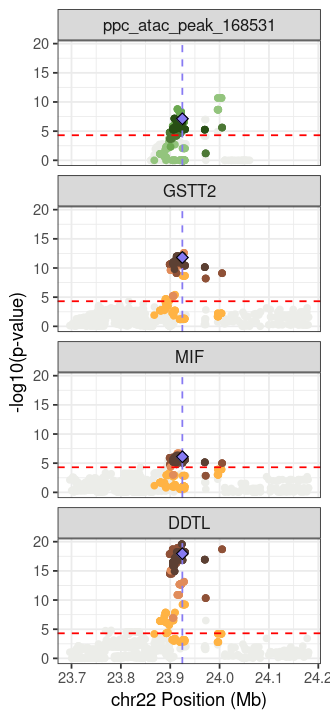

In [14]:
topsnp_pos=23924539
psize(6,2.75)
man_plot = ggplot(qtldata4, aes(x = pos/1e6, y = -log10(pval), color = color)) + geom_point() + theme_bw() + 
                    facet_wrap(.~gene_name, ncol = 1) +
                    theme(strip.text = element_text(size= 10)) + 
                    xlab("chr22 Position (Mb)") + ylab("-log10(p-value)") + 
                    geom_point(data = qtldata4 %>% filter(LD >= 0.2)) + 
                    geom_point(data = qtldata4 %>% filter(LD >= 0.4)) + 
                    geom_point(data = qtldata4 %>% filter(LD >= 0.8)) +
                    scale_color_identity()  +
                    geom_vline(xintercept = topsnp_pos/1e6, linetype = "dashed", color = "#877af3")  + 
                    geom_hline(data = qtldata4, aes(yintercept = -log10(5e-5)), linetype = "dashed", color = "red") + 
                    geom_point(data = qtldata4 %>% filter(pos == topsnp_pos), color = "#877af3", size = 3.5, shape = 18) + 
                    geom_point(data = qtldata4 %>% filter(pos == topsnp_pos), color = "black", size = 2, shape = 5) +
                    annotate("text", x = )
                    xlim((min(qtldata4$pos)/1e6)+0.8, (max(qtldata4$pos)/1e6)-0.8)

man_plot

In [69]:
groups = c("<0.2", "0.2-0.4", "0.4-0.6", "0.6-0.8", ">0.8")

color_gradients = list("eqtl" = c("#ecede9", "#ffb344", "#e18c5a", "#8f5137", "#5c4033"), # orange-brown
                       "haqtl" = c("#ecede9", "#9689b9", "#61679a", "#534876", "#2d2c4e"), # purple
                       "caqtl" = c("#ecede9", "#93c47d", "#6aa84f", "#4c7835", "#274e13")) # green
a = qtldata4 %>%
    filter(gene_name %like% "ppc") %>%
    mutate(LD_group = factor(LD_group, levels = groups))

legend0 = ggplot(a, aes(x = pos/1e6, y = -log10(pval), color = LD_group)) + geom_point() + theme_bw()  +
    facet_wrap(.~element_id, ncol = 3)  + 
    theme(
        legend.text = element_text(size = 12),
        legend.title = element_text(size = 12)
    ) +
    scale_color_manual(values = color_gradients$caqtl, labels = c("0-0.2", "0.2-0.4", "0.4-0.6", "0.6-0.8", "0.8-1"),
                       name = "LD (caQTL)") + 
    guides(color = guide_legend(override.aes = list(size = 6)))
l0 = get_legend(legend0)

a = qtldata4 %>%
    filter(!gene_name %like% "ppc") %>%
    mutate(LD_group = factor(LD_group, levels = groups))

legend1 = ggplot(a, aes(x = pos/1e6, y = -log10(pval), color = LD_group)) + geom_point() + theme_bw()  +
    facet_wrap(.~element_id, ncol = 3)  + 
    theme(
        legend.text = element_text(size = 12),
        legend.title = element_text(size = 12)
    ) +
    scale_color_manual(values = color_gradients$eqtl, labels = c("0-0.2", "0.2-0.4", "0.4-0.6", "0.6-0.8", "0.8-1"),
                       name = "LD (eQTL)") + 
    guides(color = guide_legend(override.aes = list(size = 6)))
l1 = get_legend(legend1)

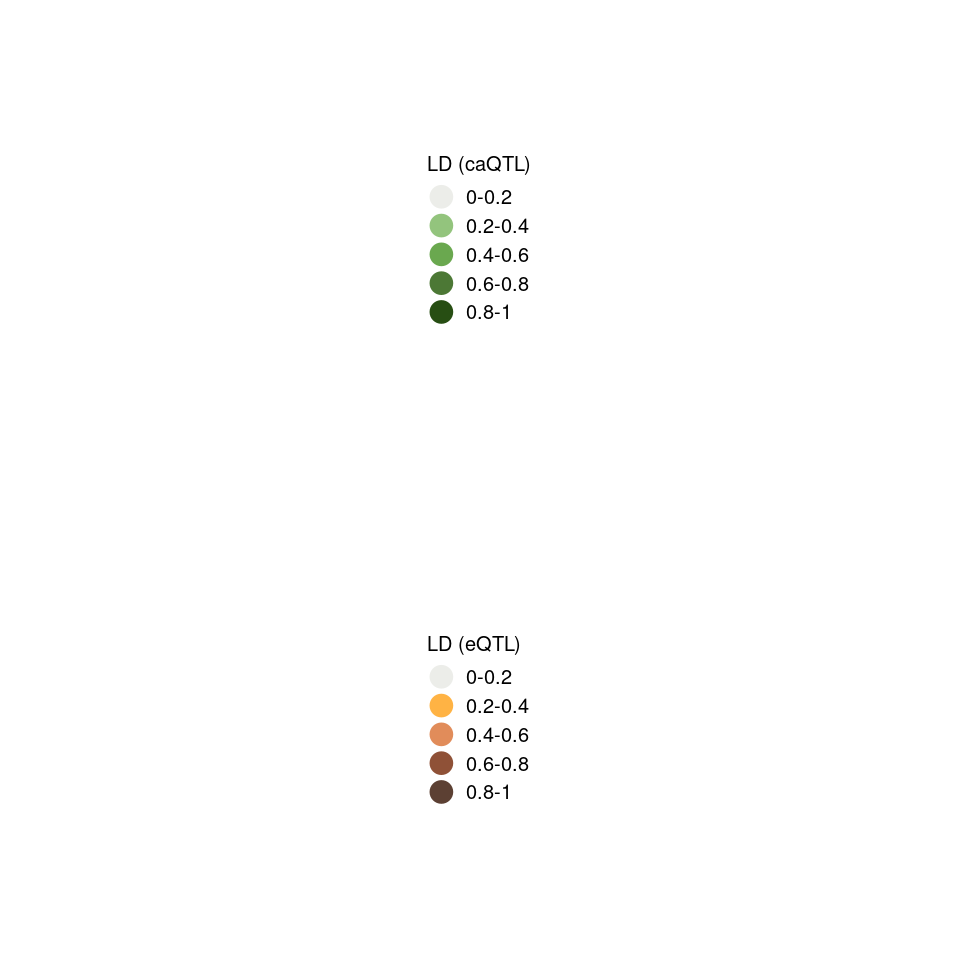

In [70]:
psize(8,8)
plot_grid(l0,l1,nrow=2)

## Figure 4

In [72]:
psize(6,6)
png("figures/Figure4.png",units="in",res=300,width=6,height=6)
plot_grid(plot_grid(summary_plot,NULL,nrow=2,rel_heights = c(2,1)),plot_grid(NULL),
          plot_grid(man_plot,plot_grid(l0,l1,nrow=2),nrow=1,rel_widths = c(1.75,1)),rel_widths = c(0.7,0.1,1),ncol=3)
dev.off()

Warning message:
“Removed 8498 rows containing missing values (`geom_point()`).”


png 
  2

In [34]:
qtldata4[ qtldata4$pos == 23924539,]

,element_id,chrpos,id,chrom,pos,ref,alt,rsid,genotyped,af,beta,se,pval,bonferroni,type,LD,LD_group,color,gene_name
,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<fct>
3431,ENSG00000099974.8,22_23924539,VAR_22_23924539_T_C,chr22,23924539,T,C,rs5751775,1,0.448718,-1.5367386,0.20666136,1.130324e-18,4.194631e-15,eqtl,1,>0.8,#5c4033,DDTL
5774,ENSG00000099984.12,22_23924539,VAR_22_23924539_T_C,chr22,23924539,T,C,rs5751775,1,0.448718,-1.3869482,0.21955496,1.585251e-12,5.876525e-09,eqtl,1,>0.8,#5c4033,GSTT2
8224,ENSG00000240972.2,22_23924539,VAR_22_23924539_T_C,chr22,23924539,T,C,rs5751775,1,0.448718,-0.3650104,0.07818382,7.939431e-07,2.943147e-03,eqtl,1,>0.8,#5c4033,MIF
11188,ppc_atac_peak_168531,22_23924539,VAR_22_23924539_T_C,chr22,23924539,T,C,rs5751775,1,0.448718,-1.3584413,0.23481893,7.611625e-08,2.146478e-05,caqtl,1,>0.8,#274e13,ppc_atac_peak_168531
